## **ARIMA and Seasonal ARIMA**
**A**uto**r**egressive **I**ntegrated **M**oving Averages 

## 1. Importing necessary packages and Read dataset

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/AbhinayHinge/Forecasting_Data/main/forecastingdata.csv')
df.head()

,date,store,Cars,sales
0,01-01-2013,1,Toyota,13
1,02-01-2013,1,Toyota,11
2,03-01-2013,1,Toyota,14
3,04-01-2013,1,Toyota,13
4,05-01-2013,1,Toyota,10


In [3]:
# Shape of dataset
df.shape

(913000, 4)

In [4]:
# Datatypes of data
df.dtypes

date     object
store     int64
Cars     object
sales     int64
dtype: object

In [5]:
# Converting object datatype of date column into date datatype
df['date']=pd.to_datetime(df['date'])

In [6]:
# Datatypes of data
df.dtypes

date     datetime64[ns]
store             int64
Cars             object
sales             int64
dtype: object

In [7]:
# Check whether any null values present or not
df.isna().sum()

date     0
store    0
Cars     0
sales    0
dtype: int64

In [8]:
# Set date as index
df.set_index('date',inplace=True)

In [9]:
df.head()

,store,Cars,sales
date,,,
2013-01-01,1,Toyota,13
2013-02-01,1,Toyota,11
2013-03-01,1,Toyota,14
2013-04-01,1,Toyota,13
2013-05-01,1,Toyota,10


## 2. Visualization of the Data

<Figure size 864x720 with 0 Axes>

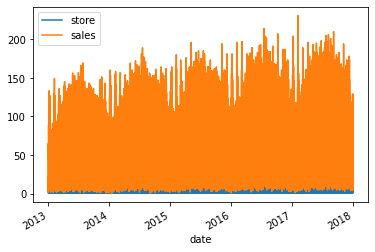

In [10]:
# Plotting graph yearwise
plt.figure(figsize=(12, 10))
df.plot()

From graph we can say that the sales of cars in year 2017 is higher compared to other years

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


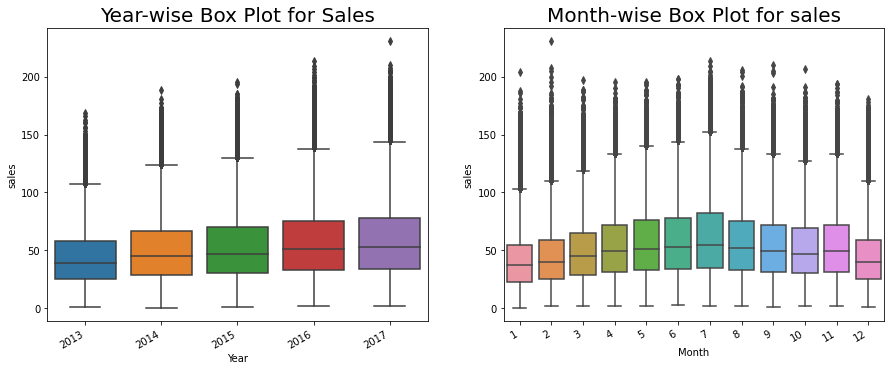

In [11]:
# Visualization using Boxplot
# Splitting the plot into (1,2) subplots
# and initializing them using fig and ax
# variables
fig, ax = plt.subplots(nrows=1, ncols=2,
                       figsize=(15, 6))
df['Year'] = df.index.year
df['Month'] = df.index.month
# Using Seaborn Library for Box Plot
sns.boxplot(df['Year'],
            df["sales"], ax=ax[0])
 
# Defining the title and axes names
ax[0].set_title('Year-wise Box Plot for Sales',
                fontsize=20, loc='center')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('sales')
 
# Using Seaborn Library for Box Plot
sns.boxplot(df['Month'],
            df["sales"], ax=ax[1])
 
# Defining the title and axes names
ax[1].set_title('Month-wise Box Plot for sales',
                fontsize=20, loc='center')
ax[1].set_xlabel('Month')
ax[1].set_ylabel('sales')
 
# rotate the ticks and right align them
fig.autofmt_xdate()

Here, through these plots, we will be able to obtain an intuition of the ‘sales’ value ranges of each year (Year-wise Box Plot) as well as each month (Month-wise Box Plot). Also, through the Month-wise Box Plot, we can observe that the value range is slightly higher in June and July, compared to other months.

<BarContainer object of 12 artists>

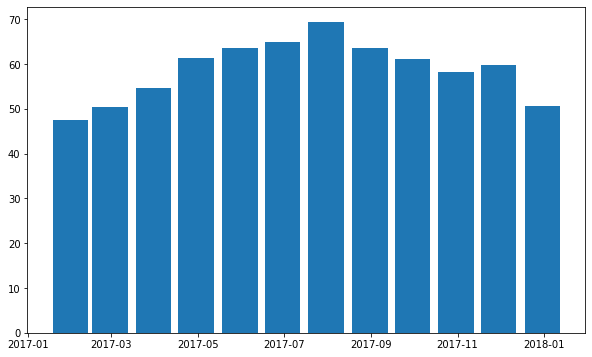

In [12]:
# Resampling the time series data based on monthly 'M' frequency
df_month = df.resample("M").mean()
  
# using subplot
fig, ax = plt.subplots(figsize=(10, 6))
  
# plotting bar graph
ax.bar(df_month['2017':].index, 
       df_month.loc['2017':, "sales"], 
       width=25, align='center')

August month has highest sales in year 2017

### Univariate Analysis

In [13]:
# To get to know total cars and their values
df['Cars'].value_counts().sort_values(ascending = False)

Toyota           18260
Acura            18260
Ferrari          18260
Tesla            18260
Seat             18260
Saturn           18260
Ram              18260
Peugeot          18260
Opel             18260
Subaru           18260
Audi             18260
Abarth           18260
Alfa Romeo       18260
Land Rover       18260
Aston Martin     18260
Bentley          18260
BMW              18260
Buick            18260
Cadillac         18260
Chevrolet        18260
Chrysler         18260
Citroen          18260
Dacia            18260
Dodge            18260
Fiat             18260
Ford             18260
GMC              18260
Suzuki           18260
Honda            18260
Hummer           18260
Hyundai          18260
Infiniti         18260
Isuzu            18260
Jaguar           18260
Jeep             18260
Kia              18260
Lamborghini      18260
Lancia           18260
Lexus            18260
Volvo            18260
Lincoln          18260
Lotus            18260
Mazda            18260
Mercedes-Be

In [14]:
# To get to know total sales of each car from data
df.groupby('Cars').sum().sort_values('sales', ascending = False)

,store,sales,Year,Month
Cars,,,,
Bentley,100430,1607442,36793910,119120
Honda,100430,1604713,36793910,119120
Alfa Romeo,100430,1539621,36793910,119120
Cadillac,100430,1538876,36793910,119120
Fiat,100430,1473334,36793910,119120
Nissan,100430,1471467,36793910,119120
Land Rover,100430,1470330,36793910,119120
Dacia,100430,1469971,36793910,119120
Lamborghini,100430,1406548,36793910,119120


In [15]:
# Resampling dataset and preparing for ARIMA model
data=df.resample('M').sum()
data.drop(['store'], axis=1,inplace=True)
data.head()

,sales,Year,Month
date,,,
2013-01-31,536883,31201500,15500
2013-02-28,521637,28182000,28000
2013-03-31,643749,31201500,46500
2013-04-30,667252,30195000,60000
2013-05-31,720997,31201500,77500


In [16]:
# Dropping unncessary columns from data for better model performance
data.drop(['Year','Month'],inplace=True, axis=1)
data.head(10)

,sales
date,
2013-01-31,536883
2013-02-28,521637
2013-03-31,643749
2013-04-30,667252
2013-05-31,720997
2013-06-30,746372
2013-07-31,793851
2013-08-31,727523
2013-09-30,676658


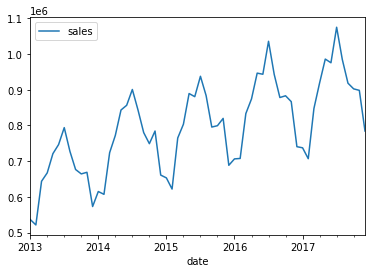

In [17]:
# Plotting graph of data dataframe for visualization
data.plot()

## 3. Checking Stationarity of data

For checking whether data is stationary or not we applied dickey fuller test i.e. adfuller test

In [18]:
# Importing necessary packages for adfuller test
from statsmodels.tsa.stattools import adfuller

In [19]:
# Applying adfuller on sales data and store it in test result
test_result=adfuller(data['sales'])

In [20]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("Rejecting the Null hypothesis. Data has no unit root and is stationary")
    else:
        print("Accepting the Null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [21]:
# Check whether data is stationary or not
adfuller_test(data['sales'])

ADF Test Statistic : -4.570251606630181
p-value : 0.00014649839461232977
#Lags Used : 11
Number of Observations Used : 48
Rejecting the Null hypothesis. Data has no unit root and is stationary


## 4. Differencing

In [22]:
# Shifting one position of sales data
data['Sales Difference 1'] = data['sales'] - data['sales'].shift(1)

In [23]:
# view the data shifted by 1
data['sales'].shift(1)

date
2013-01-31          NaN
2013-02-28     536883.0
2013-03-31     521637.0
2013-04-30     643749.0
2013-05-31     667252.0
2013-06-30     720997.0
2013-07-31     746372.0
2013-08-31     793851.0
2013-09-30     727523.0
2013-10-31     676658.0
2013-11-30     664343.0
2013-12-31     668886.0
2014-01-31     573092.0
2014-02-28     615080.0
2014-03-31     607211.0
2014-04-30     723835.0
2014-05-31     772001.0
2014-06-30     843113.0
2014-07-31     856320.0
2014-08-31     900554.0
2014-09-30     843037.0
2014-10-31     779943.0
2014-11-30     748948.0
2014-12-31     784346.0
2015-01-31     661094.0
2015-02-28     653200.0
2015-03-31     621952.0
2015-04-30     764884.0
2015-05-31     803324.0
2015-06-30     889249.0
2015-07-31     880471.0
2015-08-31     937528.0
2015-09-30     883424.0
2015-10-31     795436.0
2015-11-30     799267.0
2015-12-31     819680.0
2016-01-31     688472.0
2016-02-29     706382.0
2016-03-31     707595.0
2016-04-30     833097.0
2016-05-31     874209.0
2016-06-30 

In [24]:
# Shifting data position by 12 as our data consist of 12 months
data['Seasonal Difference 1']=data['sales']-data['sales'].shift(12)

In [25]:
# view the data
data.head(10)

,sales,Sales Difference 1,Seasonal Difference 1
date,,,
2013-01-31,536883,NaN,NaN
2013-02-28,521637,-15246.0,NaN
2013-03-31,643749,122112.0,NaN
2013-04-30,667252,23503.0,NaN
2013-05-31,720997,53745.0,NaN
2013-06-30,746372,25375.0,NaN
2013-07-31,793851,47479.0,NaN
2013-08-31,727523,-66328.0,NaN
2013-09-30,676658,-50865.0,NaN


In [26]:
# Again test dickey fuller test
adfuller_test(data['Seasonal Difference 1'].dropna())

ADF Test Statistic : -2.395080360618435
p-value : 0.14312975778856124
#Lags Used : 0
Number of Observations Used : 47
Accepting the Null hypothesis, time series has a unit root, indicating it is non-stationary 


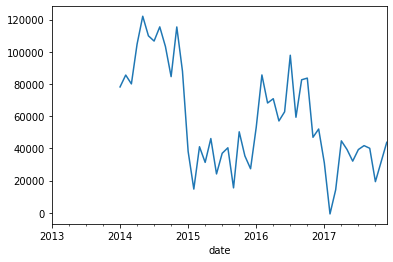

In [27]:
# Plot the graph to see stationarity of data
data['Seasonal Difference 1'].plot()

## 5. Autocorrelation plot
Identification of an AR model is often best done with the PACF( partial autocorrelation)

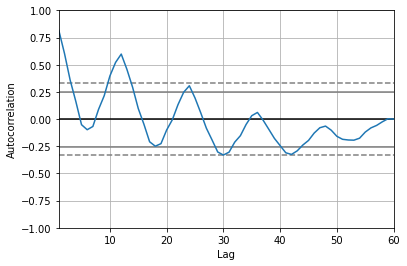

In [28]:
# Plotting Autocorrelation graph
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(data['sales'])

plt.show()

In [29]:
# Importing necessary packages for ACF(Autocorrelation function) and PACF(Partial Autocorrelation function)
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm #for decomposing the trends, seasonality etc.

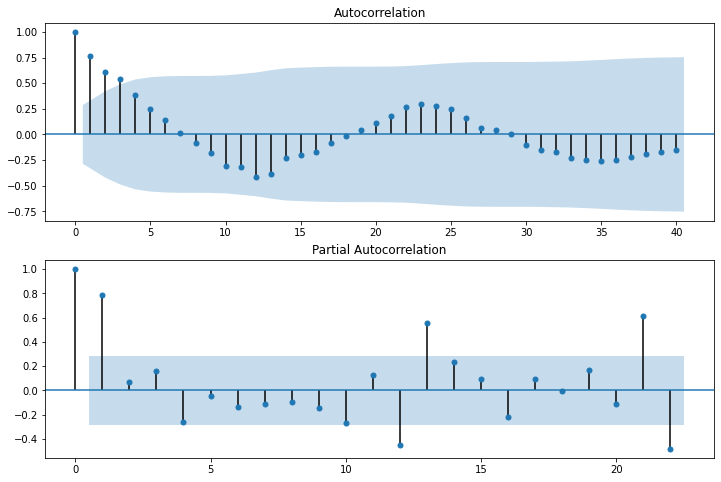

In [30]:
# Plotting ACF and PACF
fig = plt.figure(figsize=(12,8))

ax1 = fig.add_subplot(211)

fig = sm.graphics.tsa.plot_acf(data['Seasonal Difference 1'].iloc[13:],lags=40,ax=ax1)

ax2 = fig.add_subplot(212)

fig = sm.graphics.tsa.plot_pacf(data['Seasonal Difference 1'].iloc[13:],lags=22,ax=ax2)


## 6. ARIMA Model
 ARIMA works better on non seasonal data as our data is seasonal the forecasting will not be performed well

In [31]:
# Importing necessary packages
# p=1, d=1, q=0 or 1
from statsmodels.tsa.arima_model import ARIMA

In [32]:
model=ARIMA(data['sales'],order=(1,1,1))
model_fit=model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [33]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.sales   No. Observations:                   59
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -739.991
Method:                       css-mle   S.D. of innovations          67720.160
Date:                Mon, 14 Nov 2022   AIC                           1487.983
Time:                        06:44:19   BIC                           1496.293
Sample:                    02-28-2013   HQIC                          1491.227
                         - 12-31-2017                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const          4193.8305   1.05e+04      0.398      0.691   -1.65e+04    2.49e+04
ar.L1.D.sales     0.4366      0.347      1.259      0.208      -0.243       1.116
ma.L1.D.sales    -0.3231      0.345     -0.938      0.348      -0.999       0.352
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.2906           +0.0000j            2.2906            0.0000
MA.1            3.0949           +0.0000j            3.0949            0.0000
-----------------------------------------------------------------------------
"""

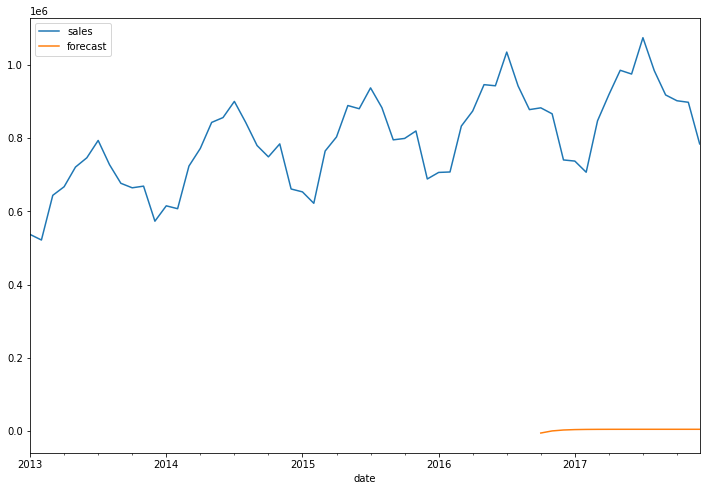

In [34]:
# Graph of forecasting the data
data['forecast']=model_fit.predict(start=45,end=80,dynamic=True)
data[['sales','forecast']].plot(figsize=(12,8))

since ARIMA Model did not conclude proper forecasting we used Seasonal ARIMAX for better forecasting

### Seasonal ARIMAX

In [35]:
# Building model on sales data
model=sm.tsa.statespace.SARIMAX(data['sales'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


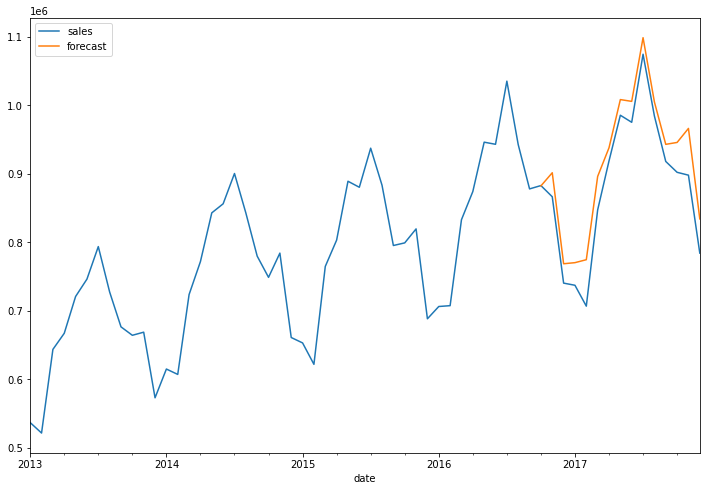

In [36]:
# Graph of actual and forecasted data
data['forecast']=results.predict(start=45,end=60,dynamic=True)
data[['sales','forecast']].plot(figsize=(12,8))

## 7. Future prediction or Forecasting 

In [37]:
# Importing necessary package to get future dates and values
from pandas.tseries.offsets import DateOffset
future_dates=[data.index[-1]+ DateOffset(months=x)for x in range(0,24)]

In [38]:
# Future dates and sales dataframe
future_dates_data=pd.DataFrame(index=future_dates[1:],columns=df.columns)
future_dates_data.tail()

,store,Cars,sales,Year,Month
2019-07-31,NaN,NaN,NaN,NaN,NaN
2019-08-31,NaN,NaN,NaN,NaN,NaN
2019-09-30,NaN,NaN,NaN,NaN,NaN
2019-10-31,NaN,NaN,NaN,NaN,NaN
2019-11-30,NaN,NaN,NaN,NaN,NaN


From above dataframe we took some future values i.e. our dataset contains values till 2017  but in this dataframe we took values till 2019.

In [39]:
# Concatenate data with future dates data
future_data=pd.concat([data,future_dates_data])

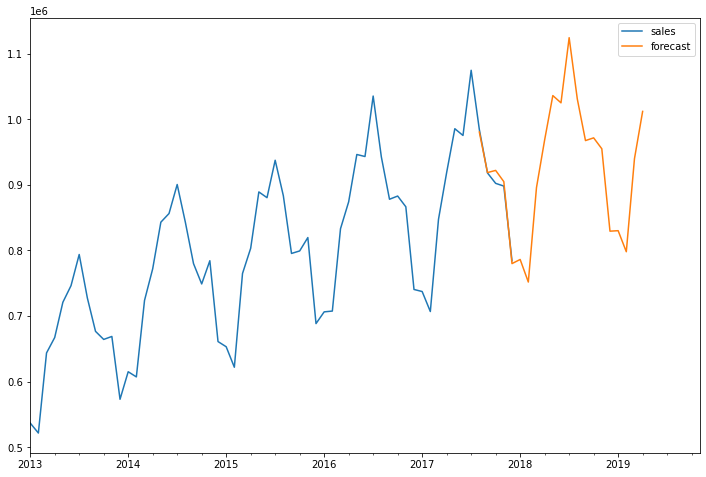

In [40]:
# Forecasting graph plot for future predicted values
future_data['forecast'] = results.predict(start = 55 , end =75 , dynamic= True)  
future_data[['sales', 'forecast']].plot(figsize=(12, 8))

From the graph we can say that the sales of cars will increase in future and will be at the peak in july and august month